In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

# Squeezed displaced vacuum

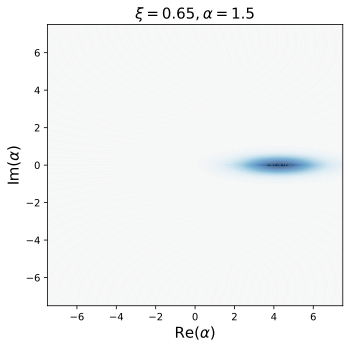

In [17]:
dim_fock = 100
a = qt.destroy(dim_fock)
alpha = 1.5  * np.exp(1j*0) # cat size

vacuum_state = qt.fock(dim_fock, 0)

# Displacement
D_op = (alpha*a.dag()-np.conj(alpha)*a).expm()
coherent_state = D_op * vacuum_state

epsilon = 0.7* np.exp(1j*(2*np.pi/2))
# Squeezing
S_op = (np.conj(epsilon)/2*a**2 - epsilon/2*(a.dag())**2).expm()
squeezed_coherent_state = S_op * coherent_state

fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
qt.plot_wigner(squeezed_coherent_state, fig=fig, ax=ax)
ax.set_title(r'$\xi = 0.65, \alpha = 1.5$', fontsize=15)
ax.set_xlabel(r'Re($\alpha$)', fontsize=15)
ax.set_ylabel(r'Im($\alpha$)', fontsize=15)
fig.tight_layout()
fig.savefig('./squeezed_displaced_vacuum.png', dpi=300)

# Cat code $N=3$

In [19]:
def coherent_state(size, angle):
    '''
    Create a coherent state
    '''
    vacuum_state = qt.fock(dim_fock, 0)
    phi_alpha = angle
    alpha_val = size * np.exp(1j*phi_alpha)

    return (alpha_val*a.dag()-np.conj(alpha_val)*a).expm() * vacuum_state

first_coherent_state = coherent_state(3, 0)
second_coherent_state = coherent_state(3, 2*np.pi/3)
third_coherent_state = coherent_state(3, 4*np.pi/3)

superimposed_state = (first_coherent_state + second_coherent_state + third_coherent_state).unit()
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
qt.plot_wigner(superimposed_state, fig=fig, ax=ax)
ax.set_title(r'$N=3, \alpha=3$', fontsize=15)
ax.set_xlabel(r'Re($\alpha$)', fontsize=15)
ax.set_ylabel(r'Im($\alpha$)', fontsize=15)
fig.tight_layout()
fig.savefig('./catN3.png', dpi=300)

# Cat code 2 losses

In [24]:
def coherent_state(size, angle):
    '''
    Create a coherent state
    '''
    vacuum_state = qt.fock(dim_fock, 0)
    phi_alpha = angle
    alpha_val = size * np.exp(1j*phi_alpha)

    return (alpha_val*a.dag()-np.conj(alpha_val)*a).expm() * vacuum_state

first_coherent_state = coherent_state(3, 0)
second_coherent_state = coherent_state(3, 2*np.pi/3)
third_coherent_state = coherent_state(3, 4*np.pi/3)

superimposed_state = (first_coherent_state + second_coherent_state + third_coherent_state).unit()

superimposed_state = (a*a*superimposed_state).unit()
fig, ax = plt.subplots(ncols=1, figsize=(5, 5))
qt.plot_wigner(superimposed_state, fig=fig, ax=ax)
ax.set_xlabel(r'Re($\alpha$)', fontsize=15)
ax.set_ylabel(r'Im($\alpha$)', fontsize=15)
ax.set_title(r'$N=3, \alpha=3, k=2$', fontsize=15)
fig.tight_layout()
fig.savefig('./catN3_error_k.png', dpi=300)